# Instructions
This is a list of exercice to be done in the environment of Google Colab. Of course, it can be adapted (expecially for the parallelization) to be used in a local machine.

The first section is dedicated to the installation and linkage of the program.

The first exercice is a very simple one to familiarize with the code functionalities.

In [1]:
import os

# Get the root directory of the project
# (change place as you wish in a local machine)
root_directory = os.path.expanduser("~")

# Install the `nested_fit` package

If you need to install the package, here are the basic commands.

If you want to install the program locally in your machine, copy the command and adapt.
For example, to enable the parallel computing, use the adapted compiltion line. More details are presented in the `README` file.


In [ ]:
# Download nested_fit
!cd $root_directory/ && rm -rf nested_fit && git clone -b dev https://github.com/martinit18/nested_fit.git

# Compilation and installation -------------------------------------------------
# Standard installation
!mkdir -p $root_directory/nested_fit/build && cd $root_directory/nested_fit/build/ && cmake -DCMAKE_BUILD_TYPE=Release .. && cmake --build . --config Release --target install
# Installation with parallelization
# mkdir -p $root_directory/nested_fit/build && cd $root_directory/nested_fit/build/ && cmake -DOPENMP=ON -DCMAKE_BUILD_TYPE=Release .. && cmake --build . --config Release --target install
# Installation in a different location (to change the $PATH accordingly). The binaries will be installed in the directory <target directory>/bin
# !mkdir -p $root_directory/nested_fit/build && cd $root_directory/nested_fit/build/ && cmake -DINSTALL_SYSTEM_WIDE=ON -DCMAKE_INSTALL_PREFIX=<target directory> -DCMAKE_BUILD_TYPE=Release .. && cmake --build . --config Release --target install
# ------------------------------------------------------------------------------


Cloning into 'nested_fit'...
remote: Enumerating objects: 3918, done.
remote: Counting objects: 100% (2038/2038), done.
remote: Compressing objects: 100% (662/662), done.
remote: Total 3918 (delta 1470), reused 1840 (delta 1331), pack-reused 1880 (from 1)
Receiving objects: 100% (3918/3918), 11.64 MiB | 11.71 MiB/s, done.
Resolving deltas: 100% (2608/2608), done.
-- The Fortran compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting Fortran compiler ABI info
-- Detecting Fortran compiler ABI info - done
-- Check for working Fortran compiler: /usr/bin/f95 - skipped
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
CMake Warning (dev) at /usr/local/lib/python3.10/dist-packages/cmake/data/share/cmake-3.30/Modules/FetchContent.cmake:1953 (message):
  Calling FetchContent_Populate(tracy) is

In [ ]:
from importlib.metadata import version as imp_version

# Install python libraries
os.chdir(root_directory+ '/nested_fit')
!pip install -e .

# Make a useful symlink
source = root_directory + '/nested_fit/bin/nested_fit' + imp_version('nested_fit')
target = root_directory + '/nested_fit/bin/nested_fit'
try: os.symlink(source, target)
except FileExistsError: pass

# Add binaries path
os.environ["PATH"] = root_directory + "/nested_fit/bin:" + os.environ["PATH"]

Obtaining file:///root/nested_fit
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for nested_fit (pyproject.toml) ... done
  Created wheel for nested_fit: filename=nested_fit-5.3.1-0.editable-cp310-cp310-linux_x86_64.whl size=4710 sha256=8df66c900a99d5b33087dda13a6d62e4762c079226c788561222729ce2f49156
  Stored in directory: /tmp/pip-ephem-wheel-cache-ads5zwrf/wheels/48/9a/c8/43e2a56374eadc41ee4e3137b8cebef909f7c6200be9d45b55
Successfully built nested_fit
  Attempting uninstall: nested_fit
    Found existing installation: nested_fit 5.3.1
    Uninstalling nested_fit-5.3.1:
      Successfully uninstalled nested_fit-5.3.1


# Preliminary operations before starting any exercice

In [2]:
# Import main python library
import pynested_fit as pynf
import os
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib widget
#%matplotlib notebook

In [3]:
# Go to the exercice folder USE THIS IN GOOGLE COLAB
root_path = root_directory + '/nested_fit/exercises/exercices_ICFO' 
os.chdir(root_path)
# If you run the program locally, use the following command only
#root_path = os.getcwd()

# Exercice 1: Run nested_sampling and optimise the input parameters
Adjust the input parameter to obtain a satisfying results in terms of accuracy and precision.
Play in particular with the number of live points and the target accuracy using the graphical outputs to detect possible problems in the analysis.

## A) Run the program

In [4]:
# Change directory
path = root_path + '/res_1gauss_bg'
os.chdir(path)

In [5]:
# Define inputs using a "latex" function
conf = pynf.Configurator(
    datafiles=['he-histo.dat'], # Name of the data file
    filefmt='.tsv',             # Format of file (here for tab and space separated)
    specstr='x,c',              # Datafile layout (here ch. and counts in ch.)
    expressions=[               # Function expression in latex form
        r'gauss_bg(x, A_1, x_1, s, b_g) = A_1 / (s \sqrt{2\pi}) \exp{-(x-x_1)^2/(2s^2)} + b_g'],
    params={                    # Parameters boundaries and co.
        'b_g': {'value': 0.01,  'step': -1, 'min': 0,   'max': 0.3 },
        'x_1': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'A_1': {'value': 300,   'step': -1, 'min': 0,   'max': 500 },
        's':   {'value': 20,    'step': -1, 'min': 10,  'max': 30  }
    },
    data={'xmin': 250, 'xmax': 650},  # Boundaries of data
    livepoints=10,                    # Number of live points
    # search_method='SLICE_SAMPLING', # Search method
    # search_params=(0.5, 3),         # Parameters of chosen method
    # search_maxsteps=100000,         # Max steps of nested sampling
    conv_accuracy=1.E-01,             # Evidence final accuracy
    # cluster_enable=False,           # clustering recognition on/off
    # cluster_method='k',             # method used
    # cluster_parameter1=0.5,         # method parameter 1 (if needed)
    # cluster_parameter2=0.2,         # method parameter 1 (if needed)
)

In [6]:
# Run the code

# For visualising the progress of the execution use this command
# out = conf.sample(output_mode='live')
# If nothing shows, use simply the command (symlink to created or version to be used) USE THIS IN GOOGLE COLAB
!nested_fit

# For silently running the code and save the raw output in a dictionnary, use this command
# out = conf.sample(output_mode='none')

========= Parsing result =========
     Latex input: A_1 / (s \sqrt{2\pi}) \exp{-(x-x_1)^2/(2s^2)} + b_g
Infix expression: A1/(s*SQRT(2*pi))*EXP(-(x-x1)**2/(2*s**2))+bg
      Parameters: A_1, b_g, s, x_1
| N. try:  1 | N. step:        100 | Min. loglike:    -330.347023881285452 | Evidence:    -340.956115564776553 | Ev. step:    -342.663608582809672 | Ev. pres. acc.:  1.8136568E+00 | Typical eff.: 1.0000 |                
  ------------------------------------------------------------------------------------------------------------------
 <ATTENTION> : End of likelihood test.
 <ATTENTION> : Number of calls : 22592
  ------------------------------------------------------------------------------------------------------------------
  
  
 ############## FINAL RESULTS #####################################################################################
 N. of trials:                                        1
 N. of total iteration:                             145
 N. of likelihood calls ((1)*

## B) Visualise the outputs

In [33]:
# Load the nested output data
# The available parameters and other variables that can be plotted are listed
an = pynf.Analysis()

Current path =  .
['A_1', 'x_1', 's', 'b_g']
Index(['weight', 'lnlikelihood', 'A_1', 'x_1', 's', 'b_g'], dtype='object')
Available parameters : ['weight', 'lnlikelihood', 'A_1', 'x_1', 's', 'b_g']


0 max
nf_output_data_max.dat


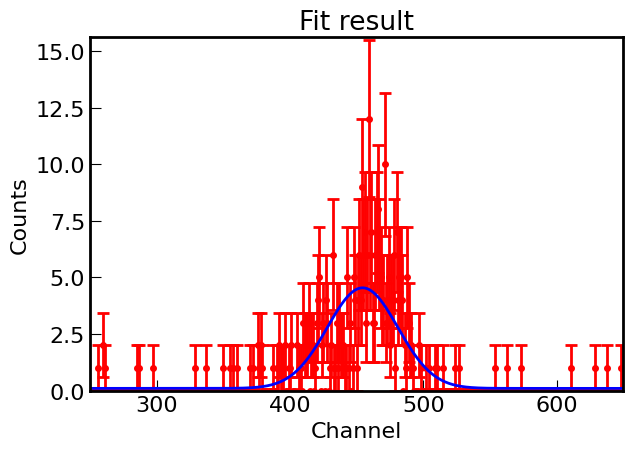

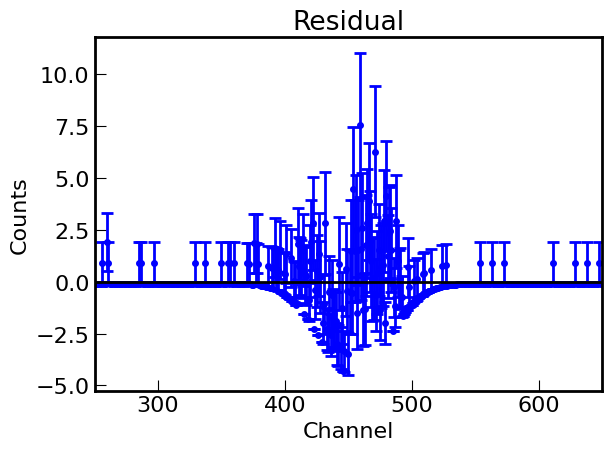

In [34]:
# Plot the data with the best fit (parameters corresponding to the maximum value of the data) and residual
# Other choices are median and mean parameters values selectable with "typeof='mean'" and "typeof='median'"
an.plot()

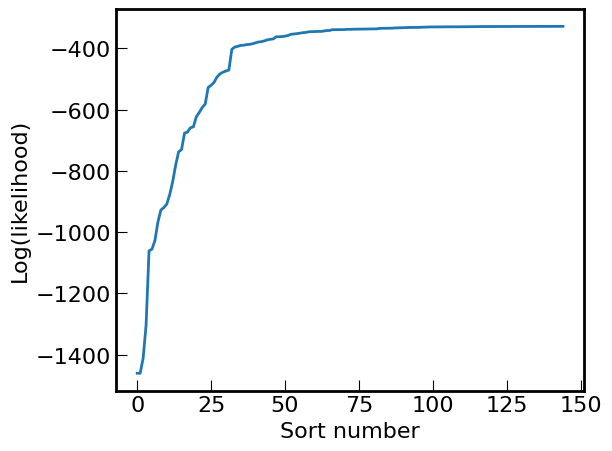

In [35]:
# Plot the likelihood sampling
an.plot_like()

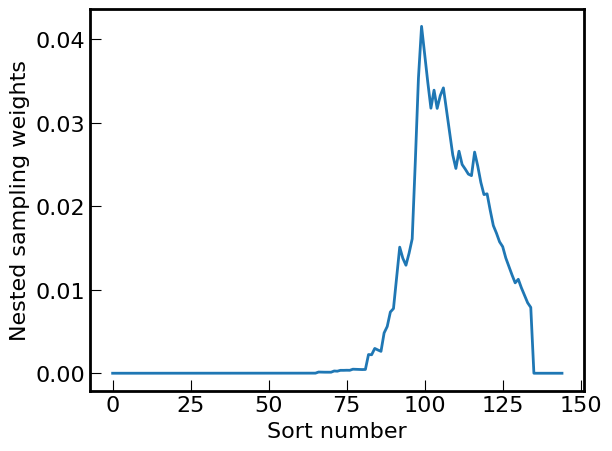

In [36]:
# Plot the weights of nested sampling corresponding to w_n = Delta X_n L_n
an.plot_weights()

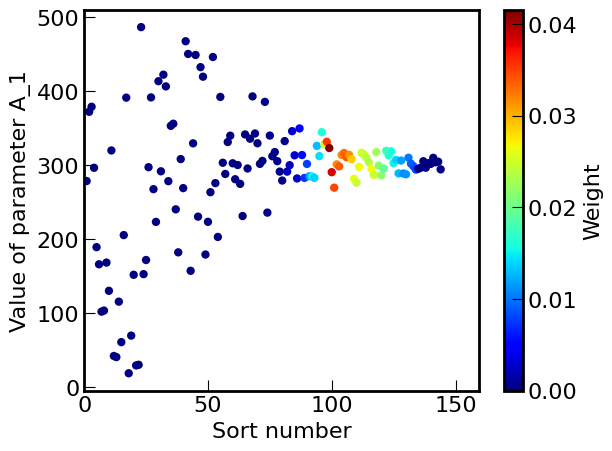

In [37]:
# Plot the parameter convergence
# Colored regions correspond to the high value of the weights
an.plot_par('A_1')

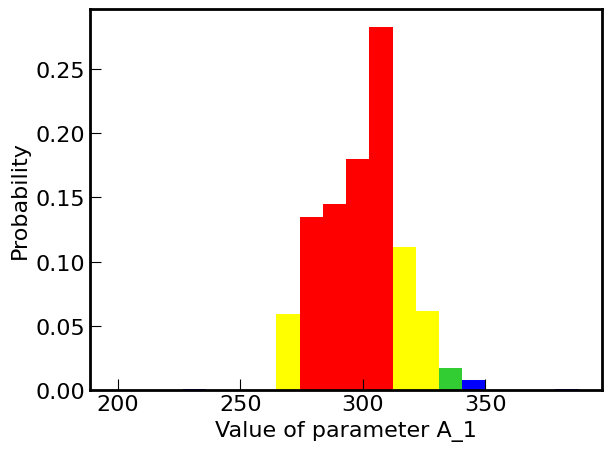

In [38]:
# Plot one parameter histogram
# Red, yellow and green region correspond to 1,2,3 sigmas
an.histo('A_1',bins=20,xmin=200,xmax=400)

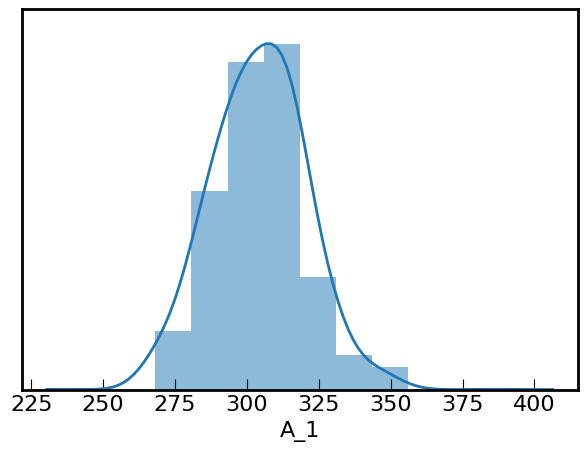

In [39]:
# Plot one parameter interpolated histogram using getdist
an.histo_interp('A_1')

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1108: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data68[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb68)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1109: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data95[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb95)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1110: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data99[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb99)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1111: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data_rest[::-1,]),interpolation='nearest',extent=extent,aspect='aut

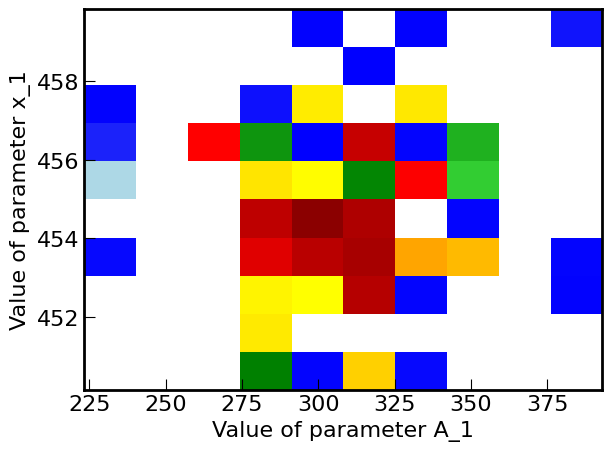

In [40]:
# Plot one parameter histogram
# Red, yellow and green region correspond to 1,2,3 sigmas
an.histo2D('A_1','x_1',bins=10,xmin=200,xmax=400,ymin=450,ymax=460)

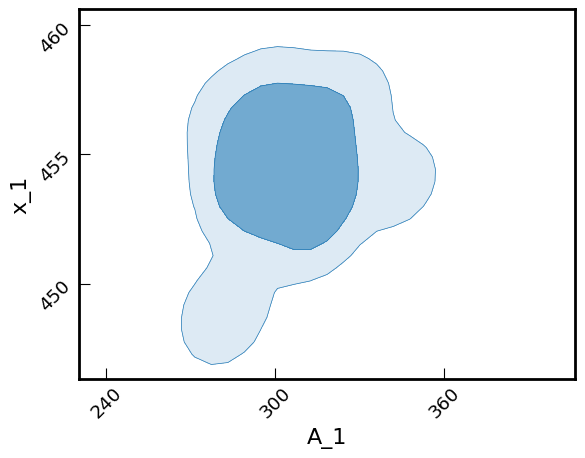

In [41]:
# Same with interpolation from getdist
an.histo2D_interp('A_1','x_1')

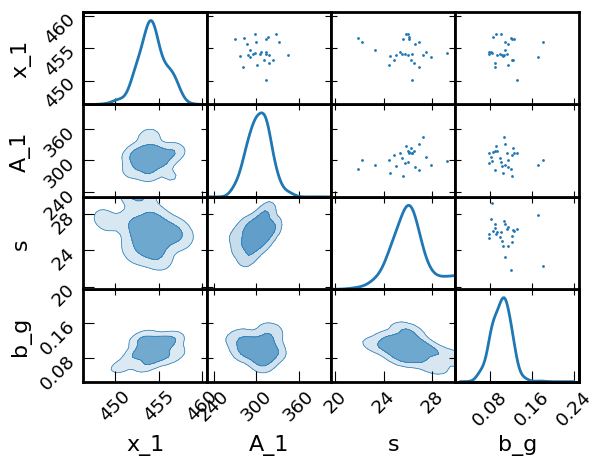

In [42]:
# Triangle plot (from anesthetic) to have a look to all parameters at the same time
an.triangle_plot(['x_1','A_1','s','b_g'])

## C) extract the information
In addition to the sampling used for create the graphics here above, the result of the analysis are summarized in the file 'nf_outout_res.dat' (a simple ASCII file) and its omologus 'nf_output_res.json'. Both files can be easily imported in python. 
In particular for the first one, the built in function 'read_output' can be used

In [43]:
# Read the output files in a dictionnary
out = an.read_output()
out.keys()

dict_keys(['ntry', 'niter', 'ncall9', 'ncall', 'nlive_out', 'evidence', 'evidence_err_est', 'evidence_err', 'like_max', 'max', 'mean', 'sd', 'par_name', 'conf_level_m99', 'conf_level_m95', 'conf_level_m68', 'conf_level_p68', 'conf_level_p95', 'conf_level_p99', 'median', 'information', 'complexity', 'n_cores', 'cpu_computation_time', 'real_computation_time'])

In [48]:
# Print some results

# The evidence
print('Evidence = ', out['evidence'],'±',out['evidence_err_est'])

# The Bayesian complexity
print('Complexity = ', out['complexity'])

# Some parameters
par_name = 'x_1'
par_index = out['par_name'].index('x_1')
print(par_name, ' = ', out['mean'][par_index],' ± ', out['sd'][par_index])


Evidence =  -339.3980549927955 ± 0.967991380339536
Complexity =  3.4511633569386504
x_1  =  454.25001816771703  ±  1.6253002805605208


In [30]:
# Statistics (from anesthetic) to have a good estimation of the uncertainties (expecially for the evidence)
an.stats()

logZ 	 = -337.902246 	± 0.750071
D_KL 	 = 7.369637 	± 0.707627
logL_P 	 = -330.532610 	± 0.389941
d_G 	 = 4.671462 	± 1.062229


## D) Optimize the input parameters to obtain a good accuracy of the evidence evaluation

# Exercice 2: Compare models
Compare the evidence corresponding to different models fit to the same data set. 
We will consider here a model with two Gaussian peaks instead of one.
For this, create a new directory `res_2gauss_bg`

Use an accuracy sufficient to make the comparison, i.e. an accuracy of the log evidence of at least 0.5.

## A) Some preparatory organization

In [49]:
# Create a new directory
os.chdir(root_path)
path = 'res_2gauss_bg'
try: os.mkdir(path)
except: print('Directory already present')
os.chdir(path)

# Copy the data file in the new directory
!cp -f ../res_1gauss_bg/he-histo.dat . 

Directory already present


## B) Run the analysis of the new model

## C) Compare the plots and the evidence of the different models
What are your conclusions?

# Exercice 3: Analyse other models with up to 4 Gaussian peaks 

- Plot and compare the **evidence** (with its error bar)
- Plot and compare the **Baysian complexity**
- What is the better model?

# Exercice 4: Explore the multimodal solutions using the cluster analysis
The cases with more than one Gaussian peak are highly multimodal. For this case you can turn on the **cluser recognition** of the live points ('cluser_enable=True') to identify the different likelihood maxima

If the clustering recognition is on, new output files are created to visualize the clusters.

For this purpose, use the functions: 
- 'plot_clusters( par_name1, par_name2 )' 
- 'plot_clusters3D( par_name1, par_name2, par_name3 )'

## A) Run the code and visualize the cluster analysis outputs

## B) Change the cluster analysis and comment the results